In [101]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
matplotlib.rcParams["xtick.labelsize"] = 18
matplotlib.rcParams["ytick.labelsize"] = 18
# matplotlib.rcParams["image.cmap"] = "Purples"
matplotlib.rcParams["image.cmap"] = "inferno"
matplotlib.rcParams["axes.titlesize"] = 18
matplotlib.rcParams["axes.labelsize"] = 18
import matplotlib.pyplot as plt

import drive
import TLS
import emission_TLS
import scattering_pulsed_TLS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
# compute P_{1,g}(infty) and P_{0,g}(infty) for the photon emission from a TLS
gamma = 0.181
pulseWidth = 0.1/gamma
pulseArea = np.linspace(0, 4*np.pi, 500)
emissionProb = []
noEmissionProb = []
timeSteps = np.linspace(0, 10/gamma, 1000)
modulation = drive.sinDrive(0, 0, 0, 0)    # unmodulated TLS
tlsObj = TLS.modulatedTLS(0, gamma, modulation)

for ii in pulseArea:
    pulseAmp = ii/pulseWidth
    laserPulse = drive.pulseDrive(pulseAmp, pulseWidth)
    emPropMatEle = emission_TLS.propagatorEle_1g(tlsObj, timeSteps, laserPulse)
    emissionProb.append(np.sum(np.abs(emPropMatEle)**2)*(timeSteps[1] - timeSteps[0]))
    
    noEmPropMatEle = emission_TLS.propagatorEle_0g(tlsObj, timeSteps, laserPulse)
    noEmissionProb.append(np.abs(noEmPropMatEle)**2)

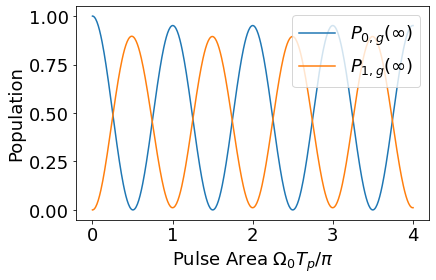

In [118]:
plt.figure()
plt.plot(pulseArea/np.pi, noEmissionProb, label="$P_{0,g}(\infty)$")
plt.plot(pulseArea/np.pi, emissionProb, label="$P_{1,g}(\infty)$")
plt.xlabel("Pulse Area $\Omega_0T_p/\pi$")
plt.ylabel("Population")
#plt.ylim((-0.03, 1.03))
plt.legend(fontsize=18, loc=1)
plt.tight_layout()
plt.savefig("Rabi.pdf")

In [119]:
# compute instantaneous responses of P_{0,g}(tau), P_{0,e}(tau), P_{1,g}(tau), and P_{1,3}(tau)
pulseWidth2 = 2.0/gamma
pulseAmp2 = 5.0*gamma
laserPulse2 = drive.pulseDrive(pulseAmp2, pulseWidth2)
timeSteps2 = np.linspace(0, 8/gamma, 1000)
insEmProp0g = np.abs(emission_TLS.insPropEle_0g(tlsObj, timeSteps2, laserPulse2, pulseWidth2))**2
insEmProp0e = np.abs(emission_TLS.insPropEle_0e(tlsObj, timeSteps2, laserPulse2, pulseWidth2))**2

In [120]:
insEmProp1g = []
insEmProp1e = []
insEmProp1gTemp = emission_TLS.insPropEle_1g(tlsObj, timeSteps2, laserPulse2, pulseWidth2)
insEmProp1eTemp = emission_TLS.insPropEle_1e(tlsObj, timeSteps2, laserPulse2, pulseWidth2)
for ii in range(timeSteps2.size):
    insEmProp1g.append(np.sum(np.abs(insEmProp1gTemp[ii])**2)*(timeSteps2[1] - timeSteps2[0]))
    insEmProp1e.append(np.sum(np.abs(insEmProp1eTemp[ii])**2)*(timeSteps2[1] - timeSteps2[0]))

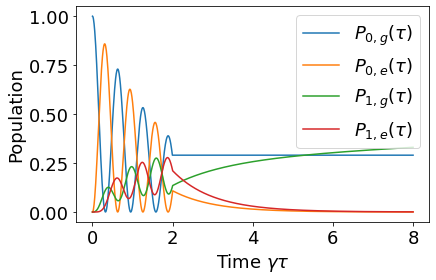

In [121]:
plt.figure()
plt.plot(timeSteps2*gamma, insEmProp0g, label="$P_{0,g}(\\tau)$")
plt.plot(timeSteps2*gamma, insEmProp0e, label="$P_{0,e}(\\tau)$")
plt.plot(timeSteps2*gamma, insEmProp1g, label="$P_{1,g}(\\tau)$")
plt.plot(timeSteps2*gamma, insEmProp1e, label="$P_{1,e}(\\tau)$")
plt.xlabel("Time $\gamma\\tau$")
plt.ylabel("Population")
plt.legend(fontsize=18, loc=1)
plt.tight_layout()
plt.savefig("instant.pdf")

In [122]:
np.shape(insEmProp1gTemp)

(1000, 1000)

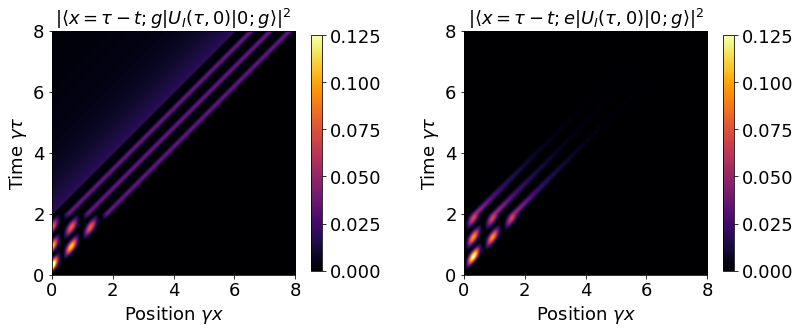

In [144]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow((np.abs(insEmProp1gTemp)**2), aspect=1, origin="lower",
           extent=[gamma*timeSteps2[0], gamma*timeSteps2[-1],
                   gamma*timeSteps2[0], gamma*timeSteps2[-1]])
plt.xlabel("Position $\gamma x$")
plt.ylabel("Time $\gamma\\tau$")
plt.title("$|\\langle x=\\tau-t;g|U_I(\\tau,0)|0;g\\rangle|^2$")
plt.clim(0.0, 0.125)
plt.colorbar(shrink=0.3)
plt.subplot(1, 2, 2)
plt.imshow((np.abs(insEmProp1eTemp)**2), aspect=1, origin="lower",
           extent=[gamma*timeSteps2[0], gamma*timeSteps2[-1],
                   gamma*timeSteps2[0], gamma*timeSteps2[-1]])
plt.xlabel("Position $\gamma x$")
plt.ylabel("Time $\gamma\\tau$")
plt.title("$|\\langle x=\\tau-t;e|U_I(\\tau,0)|0;g\\rangle|^2$")
plt.clim(0.0, 0.125)
plt.colorbar(shrink=0.3)
plt.tight_layout(pad=4.0)
plt.savefig("prob.eps")

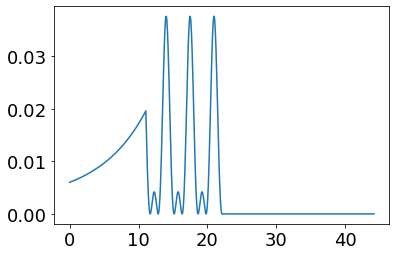

In [124]:
plt.figure()
plt.plot(timeSteps2, np.abs(insEmProp1gTemp[500])**2)

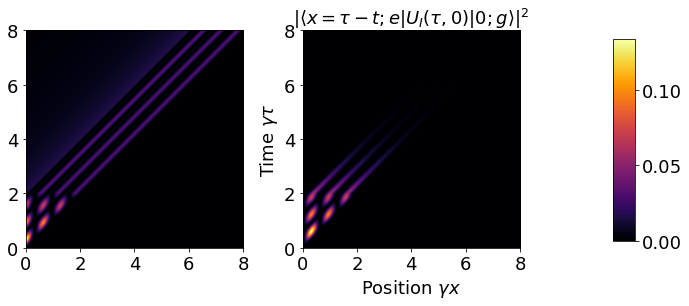

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
im = axes.flat[0].imshow((np.abs(insEmProp1gTemp)**2), aspect=1, origin="lower",
           extent=[gamma*timeSteps2[0], gamma*timeSteps2[-1],
                   gamma*timeSteps2[0], gamma*timeSteps2[-1]])
plt.xlabel("Position $\gamma x$")
plt.ylabel("Time $\gamma\\tau$")
plt.title("$|\\langle x=\\tau-t;g|U_I(\\tau,0)|0;g\\rangle|^2$")

im = axes.flat[1].imshow((np.abs(insEmProp1eTemp)**2), aspect=1, origin="lower",
           extent=[gamma*timeSteps2[0], gamma*timeSteps2[-1],
                   gamma*timeSteps2[0], gamma*timeSteps2[-1]])
plt.xlabel("Position $\gamma x$")
plt.ylabel("Time $\gamma\\tau$")
plt.title("$|\\langle x=\\tau-t;e|U_I(\\tau,0)|0;g\\rangle|^2$")

fig.subplots_adjust(right=1.3)
# put colorbar at desire position
cbar_ax = fig.add_axes([1.5, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)